# Урок 4

## Непрерывные случайные величины. Функция распределения и плотность распределения вероятностей. Равномерное и нормальное распределение. Центральная предельная теорема

## Задача 1

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.
Подсказка. 1. Можно считать, что распределение массы коробки нормальное. 2. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.

### 1-ый ВАРИАНТ

а)$A=1.06$

$P(X<1)=0.05$

$P(X<1)=0.5+Ф(\frac{1-1.06}{S})=0.5-Ф(\frac{0.06}{S})=0.05$

$Ф(\frac{0.06}{S})=0.45$

$\frac{0.06}{S}\approx1.65$

$S \approx 0.0364$

б)$P(X>1.1)=0.5-Ф(\frac{1.1-1.06}{S})\approx0.5-Ф(1.1111)\approx0.5-0.3665\approx0.1335$

Ответ: процент коробок, имеющих массу больше 1.1 кг приблизительно равен 13,35%

### 2-ой ВАРИАНТ

In [5]:
from scipy import stats
import numpy as np
import pandas as pd

In [27]:
loc = 1.06
scales = np.arange(0.035, 0.038, 0.0001)
prob = [int(stats.norm(loc, scale).cdf(1)*10000)/10000 for scale in scales]
d = pd.DataFrame(list(zip(scales, prob)), columns = ['scale', 'prob'])
d['diff'] = abs(d['prob'] - 0.05)

In [28]:
scale = d.loc[d['diff'] == min(d['diff']), 'scale']
scale

15    0.0365
Name: scale, dtype: float64

In [29]:
prob = 1 - stats.norm(loc, scale).cdf(1.1)
print(f'Ответ:процент коробок, имеющих массу больше 1.1 кг приблизительно равен {prob[0]*100:.02f}%')

Ответ:процент коробок, имеющих массу больше 1.1 кг приблизительно равен 13.66%


## Задача 2

Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.

Массой самой коробки можно пренебречь.

Подсказка. Для равномерного распределения в промежутке [a, b]:
1. мат. ожидание равно (a + b) / 2,
2. дисперсия равна (b - a)^2 / 12.

In [32]:
a,b = 12,14
M = (a + b)/2
D = (b - a)**2 / 12
n = 30
loc = n * M
scale = (D * n) ** 0.5
loc, scale

(390.0, 3.1622776601683795)

In [34]:
#a)меньше 390 граммов
box = stats.norm(loc, scale)
box1 = box.cdf(390)
box1

0.5

In [39]:
#б)больше 395 граммов
box2 = 1 - box.cdf(395)
box2

0.056923149003329065

In [37]:
#в)от 380 до 400 граммов.
prob3 = 1 - box.cdf(380) - (1 - box.cdf(400))
prob3

0.9984345977419975

## Задача 3
Продемонстрируйте действие центральной предельной теоремы на каком-нибудь распределении на ваш выбор (кроме нормального). Что для этого нужно сделать:
1. Выберите несколько значений n (5, 10, 50).
2. Для выбранного значения n сгенерируйте 1000 раз выборку размера n из выбранного вами распределения, посчитайте по этой выборке выборочное среднее.
3. Изобразите гистограмму из полученных 1000 значений выборочного среднего с аргументом density=True.
4. Поверх гистограммы нарисуйте функцию плотности нормального распределения с параметрами из ЦПТ (т.е. mu = M, sigma^2 = D / n, где M - мат. ожидание выбранного вами распределения,  D - его дисперсия).
При достаточно большом n гистограмма должна соответствовать построенной функции плотности.

In [30]:
from scipy.stats import chi2, norm
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

Text(0, 0.5, 'Probability')

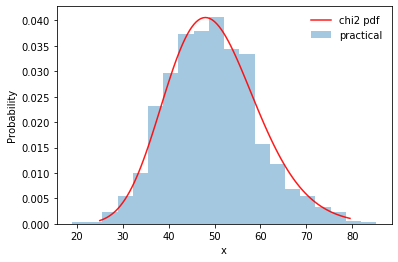

In [31]:
df = 50 # количество степеней свободы
# сгенерируем выборку из 1000 элементов и построим гистограмму
r = chi2.rvs(df, size=1000)
plt.hist(r, 20, density=True, histtype='stepfilled', alpha=0.4, label='practical')
# теперь постороим теоретическую функцию плотности вероятности поверх начального графика
x = np.arange(25.,80.,0.5)
plt.plot(x, chi2.pdf(x, df),'r', alpha=0.9, label='chi2 pdf')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('Probability')

Из графика видно, что получившаяся гистограмма относительно совпадает с функцией плотности вероятности нашего распределения. Такой результат мы и ожидали увидеть.

In [32]:
# создадим массив выборочных средних 3000 выборок размера 2,5,10,50 (по 1000 выборок для каждого размера)
size = [5,10,50]
sm = []
bins = np.arange(40.,60.,0.5)
for i in size:
    for _ in itertools.repeat(None, 1000):
        rv = chi2.rvs(df, size=i)
        sm.append(np.mean(rv))

Text(0, 0.5, 'Probability')

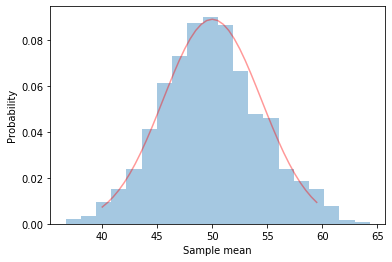

In [33]:
# построим гистограмму и график нормального распределения для выборки размера 5
plt.hist(sm[0:1000], 20, density=True, histtype='stepfilled', alpha=0.4, label='mean hist')
plt.plot(bins, norm.pdf(bins, df, np.sqrt(2*df/5.)),'r', alpha=0.4, label='norm pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

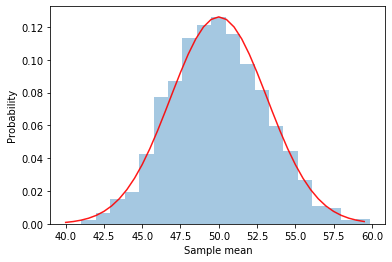

In [34]:
# построим гистограмму и график нормального распределения для выборки размера 10
plt.hist(sm[1000:2000], 20, density=True, histtype='stepfilled', alpha=0.4, label='mean hist')
plt.plot(bins, norm.pdf(bins, df, np.sqrt(2*df/10.)),'r', alpha=0.9, label='norm pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

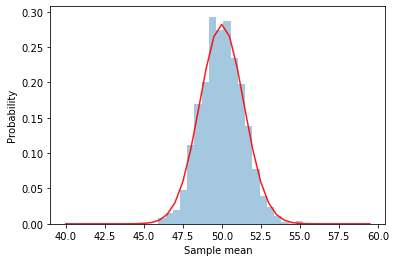

In [35]:
# построим гистограмму и график нормального распределения для выборки размера 50
plt.hist(sm[2000:3000], 20, density=True, histtype='stepfilled', alpha=0.4, label='mean hist')
plt.plot(bins, norm.pdf(bins, df, np.sqrt(2*df/50.)),'r', alpha=0.9, label='norm pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')

### Вывод
Осноные моменты центральной предельной теоремы выполняются: 

Во-первых, гистограмму распределения можно описать нормальным распределением.

Во-вторых, заметно, что при увеличении размера выборки гистограмма начинает точнее напоминать нормальное распределение, а также можно увидеть, что дисперсия понижается (это очевидно из формул, но на графиках получается нагляднее).